<a href="https://colab.research.google.com/github/sukhmir/medical-Tests-recommendation-system/blob/main/Capstone_Project.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#-: Capstone project :-
##Title:-
 Medical Tests recommendation system using patient symptoms
##Chatbot name:-
"GB-MediBot"




In [27]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


#preprocessing

1.   load data




In [28]:
import pandas as pd
data=pd.read_csv(r"/content/drive/MyDrive/capstone_data/symptoms based medical test recommendations.csv")

In [29]:
data

,Questions,medical tests,predicted disease
0,"I have a fever, cough, body aches, headache, a...","Complete Blood Count (CBC),C-Reactive Protein ...",Influenza (Flu)
1,"My symptoms include a sore throat, runny nose,...","Complete Blood Count (CBC),C-Reactive Protein ...",Influenza (Flu)
2,"I'm experiencing chest congestion, shortness o...","Complete Blood Count (CBC),C-Reactive Protein ...",Influenza (Flu)
3,"I have a high fever, nausea, and vomiting. Whi...","Complete Blood Count (CBC),C-Reactive Protein ...",Influenza (Flu)
4,"My symptoms involve a persistent cough, fatigu...","Complete Blood Count (CBC),C-Reactive Protein ...",Influenza (Flu)
...,...,...,...
1493,Is it common for salt cravings and nausea to b...,"Cortisol Levels,Adrenocorticotropic Hormone (A...",Addison's Disease
1494,I have salt and water imbalance and fatigue. W...,"Cortisol Levels,Adrenocorticotropic Hormone (A...",Addison's Disease
1495,Could weight loss and joint pain be linked to ...,"Cortisol Levels,Adrenocorticotropic Hormone (A...",Addison's Disease
1496,I'm struggling with loss of appetite and darke...,"Cortisol Levels,Adrenocorticotropic Hormone (A...",Addison's Disease


In [30]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1498 entries, 0 to 1497
Data columns (total 3 columns):
 #   Column             Non-Null Count  Dtype 
---  ------             --------------  ----- 
 0   Questions          1498 non-null   object
 1   medical tests      1498 non-null   object
 2   predicted disease  1498 non-null   object
dtypes: object(3)
memory usage: 35.2+ KB


In [31]:
from sklearn.preprocessing import LabelEncoder

# Create a label encoder
label_encoder = LabelEncoder()

# Fit and transform your target labels
data['encoded_labels'] = label_encoder.fit_transform(data['predicted disease'])


In [32]:
data.head(100)


,Questions,medical tests,predicted disease,encoded_labels
0,"I have a fever, cough, body aches, headache, a...","Complete Blood Count (CBC),C-Reactive Protein ...",Influenza (Flu),20
1,"My symptoms include a sore throat, runny nose,...","Complete Blood Count (CBC),C-Reactive Protein ...",Influenza (Flu),20
2,"I'm experiencing chest congestion, shortness o...","Complete Blood Count (CBC),C-Reactive Protein ...",Influenza (Flu),20
3,"I have a high fever, nausea, and vomiting. Whi...","Complete Blood Count (CBC),C-Reactive Protein ...",Influenza (Flu),20
4,"My symptoms involve a persistent cough, fatigu...","Complete Blood Count (CBC),C-Reactive Protein ...",Influenza (Flu),20
...,...,...,...,...
95,"I've been hoarse, lost weight, and feel fatigu...","Tuberculin Skin Test (TST) or Mantoux Test,Int...",Tuberculosis (TB),29
96,"I'm experiencing night sweats, chills, and che...","Tuberculin Skin Test (TST) or Mantoux Test,Int...",Tuberculosis (TB),29
97,"I've had chest pain, weight loss, and a persis...","Tuberculin Skin Test (TST) or Mantoux Test,Int...",Tuberculosis (TB),29
98,"I'm coughing up blood, have night sweats, and ...","Tuberculin Skin Test (TST) or Mantoux Test,Int...",Tuberculosis (TB),29


In [33]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1498 entries, 0 to 1497
Data columns (total 4 columns):
 #   Column             Non-Null Count  Dtype 
---  ------             --------------  ----- 
 0   Questions          1498 non-null   object
 1   medical tests      1498 non-null   object
 2   predicted disease  1498 non-null   object
 3   encoded_labels     1498 non-null   int64 
dtypes: int64(1), object(3)
memory usage: 46.9+ KB


In [34]:
data['encoded_labels'].value_counts()

20    50
29    50
18    50
19    50
12    50
21    50
26    50
8     50
22    50
2     50
4     50
27    50
25    50
23    50
5     50
3     50
1     50
28    50
17    50
10    50
11    50
13    50
7     50
16    50
6     50
24    50
14    50
0     50
9     49
15    49
Name: encoded_labels, dtype: int64

In [79]:
data['predicted disease'].unique()

array(['Influenza (Flu)', 'Tuberculosis (TB)', 'HIV/AIDS', 'Malaria',
       'COVID-19.', 'Hepatitis', 'Cholera', 'Ebola Virus Disease',
       'Dengue Fever', 'Coronary Artery Disease (CAD)',
       'Hypertension (High Blood Pressure)',
       'Heart Attack (Myocardial Infarction)', 'Stroke',
       'Arrhythmias (Irregular Heartbeat)', 'Atherosclerosis',
       'Breast Cancer', 'Lung Cancer', 'Prostate Cancer',
       'Colorectal Cancer', 'Skin Cancer (Melanoma)', 'Brain Cancer',
       'Asthma', 'Leukemia', 'Chronic Obstructive ',
       'Pulmonary Disease (COPD)', 'Interstitial Lung Disease',
       'Diabetes', 'Hypothyroidism (Underactive Thyroid)',
       'Hyperthyroidism (Overactive Thyroid)', "Addison's Disease"],
      dtype=object)

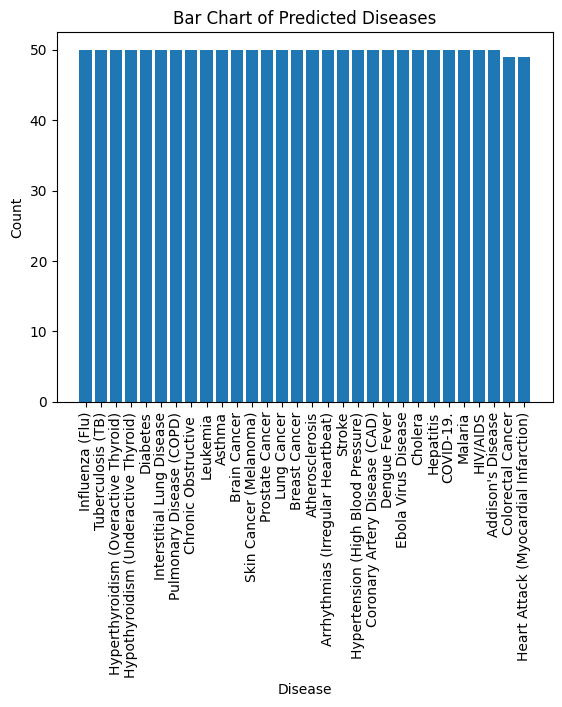

In [35]:
import matplotlib.pyplot as plt

# Count the unique values in the "predicted disease" column
unique_counts = data['predicted disease'].value_counts()

# Create a bar chart
plt.bar(unique_counts.index, unique_counts)

# Add labels
plt.xlabel('Disease')
plt.ylabel('Count')
plt.title('Bar Chart of Predicted Diseases')

# Rotate x-axis labels for better readability (if needed)
plt.xticks(rotation=90)

# Show the chart
plt.show()



#Installing and importing some important libraries



In [36]:
!pip install --upgrade transformers

In [37]:

import pandas as pd
import numpy as np
from tqdm.auto import tqdm
import tensorflow as tf
from transformers import BertTokenizer

#Now use BertTokenizer


In [38]:
tokenizer = BertTokenizer.from_pretrained('bert-base-cased')


In [39]:
#test the tokenizer for one sentence
token = tokenizer.encode_plus(
    data['Questions'].iloc[0],
    max_length=256,
    truncation=True,
    padding='max_length',
    add_special_tokens=True,
    return_tensors='tf'
)

In [40]:
token.input_ids

<tf.Tensor: shape=(1, 256), dtype=int32, numpy=
array([[  101,   146,  1138,   170, 10880,   117, 21810,   117,  1404,
        12953,  1116,   117, 16320,   117,  1105, 18418,   119,  1327,
         5715,  1202,  1128, 18029,   136,   102,     0,     0,     0,
            0,     0,     0,     0,     0,     0,     0,     0,     0,
            0,     0,     0,     0,     0,     0,     0,     0,     0,
            0,     0,     0,     0,     0,     0,     0,     0,     0,
            0,     0,     0,     0,     0,     0,     0,     0,     0,
            0,     0,     0,     0,     0,     0,     0,     0,     0,
            0,     0,     0,     0,     0,     0,     0,     0,     0,
            0,     0,     0,     0,     0,     0,     0,     0,     0,
            0,     0,     0,     0,     0,     0,     0,     0,     0,
            0,     0,     0,     0,     0,     0,     0,     0,     0,
            0,     0,     0,     0,     0,     0,     0,     0,     0,
            0,     0,     0, 

In [41]:
X_input_ids = np.zeros((len(data), 256))
X_attn_masks = np.zeros((len(data), 256))

In [42]:
def generate_training_data(data, ids, masks, tokenizer):
    for i, text in tqdm(enumerate(data['Questions'])):
        tokenized_text = tokenizer.encode_plus(
            text,
            max_length=256,
            truncation=True,
            padding='max_length',
            add_special_tokens=True,
            return_tensors='tf'
        )
        ids[i, :] = tokenized_text.input_ids
        masks[i, :] = tokenized_text.attention_mask
    return ids, masks

In [43]:
X_input_ids, X_attn_masks = generate_training_data(data, X_input_ids, X_attn_masks, tokenizer)

0it [00:00, ?it/s]

In [44]:
labels = np.zeros((len(data), 30))
labels.shape

(1498, 30)

In [45]:
labels[np.arange(len(data)), data['encoded_labels'].values] = 1

In [46]:
labels

array([[0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       ...,
       [1., 0., 0., ..., 0., 0., 0.],
       [1., 0., 0., ..., 0., 0., 0.],
       [1., 0., 0., ..., 0., 0., 0.]])

### Creating a data pipeline using tensorflow dataset utility, creates batches of data for easy loading..

In [47]:
dataset = tf.data.Dataset.from_tensor_slices((X_input_ids, X_attn_masks, labels))
dataset.take(1) # one sample data

<_TakeDataset element_spec=(TensorSpec(shape=(256,), dtype=tf.float64, name=None), TensorSpec(shape=(256,), dtype=tf.float64, name=None), TensorSpec(shape=(30,), dtype=tf.float64, name=None))>

In [48]:
def SentimentDatasetMapFunction(input_ids, attn_masks, labels):
    return {
        'input_ids': input_ids,
        'attention_mask': attn_masks
    }, labels

In [49]:
dataset = dataset.map(SentimentDatasetMapFunction) # converting to required format for tensorflow dataset

In [50]:
dataset.take(1)

<_TakeDataset element_spec=({'input_ids': TensorSpec(shape=(256,), dtype=tf.float64, name=None), 'attention_mask': TensorSpec(shape=(256,), dtype=tf.float64, name=None)}, TensorSpec(shape=(30,), dtype=tf.float64, name=None))>

#Split the data to test and train

In [51]:
dataset = dataset.shuffle(10000).batch(16, drop_remainder=True) # batch size, drop any left out tensor


In [52]:

dataset.take(1)

<_TakeDataset element_spec=({'input_ids': TensorSpec(shape=(16, 256), dtype=tf.float64, name=None), 'attention_mask': TensorSpec(shape=(16, 256), dtype=tf.float64, name=None)}, TensorSpec(shape=(16, 30), dtype=tf.float64, name=None))>

In [59]:
p=0.8
train_size = int((len(data)//16)*p) # for each 16 batch of data we will have len(df)//16 samples, take 80% of that for train.


In [60]:
train_size

74

In [61]:
train_dataset = dataset.take(train_size)
val_dataset = dataset.skip(train_size)


#Now lets use BERT model

In [63]:
from transformers import TFBertModel


In [64]:
model = TFBertModel.from_pretrained('bert-base-cased') # bert base model with pretrained weights

Some weights of the PyTorch model were not used when initializing the TF 2.0 model TFBertModel: ['cls.seq_relationship.weight', 'cls.predictions.transform.dense.bias', 'cls.predictions.transform.LayerNorm.weight', 'cls.predictions.transform.LayerNorm.bias', 'cls.predictions.transform.dense.weight', 'cls.seq_relationship.bias', 'cls.predictions.bias']
- This IS expected if you are initializing TFBertModel from a PyTorch model trained on another task or with another architecture (e.g. initializing a TFBertForSequenceClassification model from a BertForPreTraining model).
- This IS NOT expected if you are initializing TFBertModel from a PyTorch model that you expect to be exactly identical (e.g. initializing a TFBertForSequenceClassification model from a BertForSequenceClassification model).
All the weights of TFBertModel were initialized from the PyTorch model.
If your task is similar to the task the model of the checkpoint was trained on, you can already use TFBertModel for predictions w

In [65]:

# defining 2 input layers for input_ids and attn_masks
input_ids = tf.keras.layers.Input(shape=(256,), name='input_ids', dtype='int32')
attn_masks = tf.keras.layers.Input(shape=(256,), name='attention_mask', dtype='int32')

In [71]:
bert_embds = model.bert(input_ids, attention_mask=attn_masks)[1] # 0 -> activation layer (3D), 1 -> pooled output layer (2D)
intermediate_layer = tf.keras.layers.Dense(512, activation='relu', name='intermediate_layer')(bert_embds)
output_layer = tf.keras.layers.Dense(30, activation='softmax', name='output_layer')(intermediate_layer) # softmax -> calcs probs of classes

sentiment_model = tf.keras.Model(inputs=[input_ids, attn_masks], outputs=output_layer)
sentiment_model.summary()

Model: "model_1"
__________________________________________________________________________________________________
 Layer (type)                Output Shape                 Param #   Connected to                  
 input_ids (InputLayer)      [(None, 256)]                0         []                            
                                                                                                  
 attention_mask (InputLayer  [(None, 256)]                0         []                            
 )                                                                                                
                                                                                                  
 bert (TFBertMainLayer)      TFBaseModelOutputWithPooli   1083102   ['input_ids[0][0]',           
                             ngAndCrossAttentions(last_   72         'attention_mask[0][0]']      
                             hidden_state=(None, 256, 7                                     

#Model Training



In [72]:
import tensorflow as tf

# Define the initial learning rate and other hyperparameters
initial_learning_rate = 1e-5
decay_steps = 10000  # Adjust this value as needed
decay_rate = 0.9  # Adjust this value as needed

# Define a learning rate schedule with exponential decay
learning_rate_schedule = tf.keras.optimizers.schedules.ExponentialDecay(
    initial_learning_rate, decay_steps, decay_rate, staircase=False
)

# Create an optimizer with the learning rate schedule
optim = tf.keras.optimizers.Adam(learning_rate=learning_rate_schedule)

# Define other components like loss and accuracy
loss_func = tf.keras.losses.CategoricalCrossentropy()
acc = tf.keras.metrics.CategoricalAccuracy('accuracy')


In [73]:
sentiment_model.compile(optimizer=optim, loss=loss_func, metrics=[acc])

In [75]:
hist = sentiment_model.fit(
    train_dataset,
    validation_data=val_dataset,
    epochs=10
)

Epoch 1/10
74/74 [==============================] - 69s 931ms/step - loss: 1.4207 - accuracy: 0.8083 - val_loss: 0.8379 - val_accuracy: 0.8980
Epoch 2/10
74/74 [==============================] - 68s 926ms/step - loss: 0.8493 - accuracy: 0.8944 - val_loss: 0.5232 - val_accuracy: 0.9539
Epoch 3/10
74/74 [==============================] - 68s 919ms/step - loss: 0.5434 - accuracy: 0.9341 - val_loss: 0.3546 - val_accuracy: 0.9408
Epoch 4/10
74/74 [==============================] - 68s 920ms/step - loss: 0.3667 - accuracy: 0.9519 - val_loss: 0.2280 - val_accuracy: 0.9803
Epoch 5/10
74/74 [==============================] - 68s 922ms/step - loss: 0.2752 - accuracy: 0.9595 - val_loss: 0.1733 - val_accuracy: 0.9704
Epoch 6/10
74/74 [==============================] - 69s 927ms/step - loss: 0.2098 - accuracy: 0.9688 - val_loss: 0.1123 - val_accuracy: 0.9868
Epoch 7/10
74/74 [==============================] - 68s 920ms/step - loss: 0.1570 - accuracy: 0.9789 - val_loss: 0.0823 - val_accuracy: 0.9934

###plot graphs

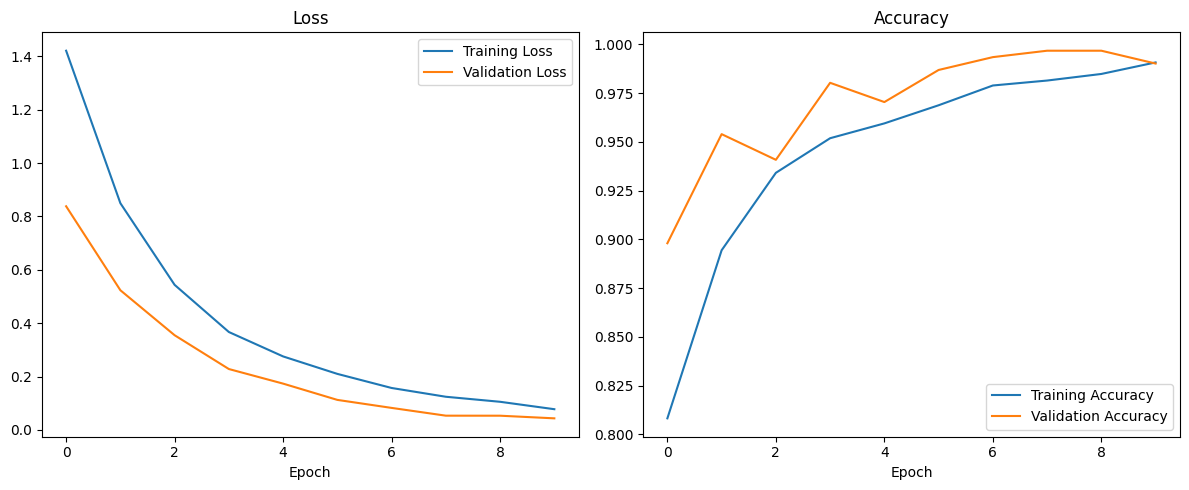

In [77]:
import matplotlib.pyplot as plt

# Extract training and validation loss and accuracy from the history
train_loss = hist.history['loss']
val_loss = hist.history['val_loss']
train_accuracy = hist.history['accuracy']
val_accuracy = hist.history['val_accuracy']

# Create subplots for loss and accuracy
plt.figure(figsize=(12, 5))

# Plot training and validation loss
plt.subplot(1, 2, 1)
plt.plot(train_loss, label='Training Loss')
plt.plot(val_loss, label='Validation Loss')
plt.title('Loss')
plt.xlabel('Epoch')
plt.legend()

# Plot training and validation accuracy
plt.subplot(1, 2, 2)
plt.plot(train_accuracy, label='Training Accuracy')
plt.plot(val_accuracy, label='Validation Accuracy')
plt.title('Accuracy')
plt.xlabel('Epoch')
plt.legend()

plt.tight_layout()
plt.show()


#Saving & Loading the model

In [76]:
sentiment_model.save('sentiment_model')

#Load saved model and predict

In [80]:

sentiment_model = tf.keras.models.load_model('sentiment_model')

tokenizer = BertTokenizer.from_pretrained('bert-base-cased')

def prepare_data(input_text, tokenizer):
    token = tokenizer.encode_plus(
        input_text,
        max_length=256,
        truncation=True,
        padding='max_length',
        add_special_tokens=True,
        return_tensors='tf'
    )
    return {
        'input_ids': tf.cast(token.input_ids, tf.float64),
        'attention_mask': tf.cast(token.attention_mask, tf.float64)
    }

def make_prediction(model, processed_data, classes=['Influenza (Flu)', 'Tuberculosis (TB)', 'HIV/AIDS', 'Malaria',
       'COVID-19.', 'Hepatitis', 'Cholera', 'Ebola Virus Disease',
       'Dengue Fever', 'Coronary Artery Disease (CAD)',
       'Hypertension (High Blood Pressure)',
       'Heart Attack (Myocardial Infarction)', 'Stroke',
       'Arrhythmias (Irregular Heartbeat)', 'Atherosclerosis',
       'Breast Cancer', 'Lung Cancer', 'Prostate Cancer',
       'Colorectal Cancer', 'Skin Cancer (Melanoma)', 'Brain Cancer',
       'Asthma', 'Leukemia', 'Chronic Obstructive ',
       'Pulmonary Disease (COPD)', 'Interstitial Lung Disease',
       'Diabetes', 'Hypothyroidism (Underactive Thyroid)',
       'Hyperthyroidism (Overactive Thyroid)', "Addison's Disease"]):
    probs = model.predict(processed_data)[0]
    return classes[np.argmax(probs)]


In [82]:
input_text = input('welcome, and please enter your symptoms: ')
processed_data = prepare_data(input_text, tokenizer)
result = make_prediction(sentiment_model, processed_data=processed_data)
print(f"You may have: {result}")


welcome, and please enter your symptoms: i have a headache,fatigue
1/1 [==============================] - 0s 74ms/step
You may have: Brain Cancer
